## Linear Discriminant Analisys (LDA)

This work implements one of the data classification algorithms (Linear Discriminant Analysis) manually and using an "out-of-the-box" approach.

The data vector refers to the dataset.

Data preparation (feature vector acquisition):
To achieve this, it is necessary to perform dimensionality reduction in the dataset used using the LDA method.

Classification task:
Conduct classification using the LDA method, determine the classification error, construct a confusion matrix, and calculate classification metrics.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci_opt
from math import sqrt, exp, pi
from scipy.stats import norm
from matplotlib.colors import ListedColormap
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from sklearn.model_selection import train_test_split

Loading the dataset and splitting it into train and test sets.

In [ ]:
from sklearn import datasets
data = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(data['data'], data['target'],  random_state = 42, test_size = 0.2)

Calculation of normalized within-class scatter matrices.

m0 - the within-class scatter matrix of the first class, normalized by the total number of data in the training set.

m1 - the within-class scatter matrix of the second class, normalized by the total number of data in the training set.

In [ ]:
N = y_train.shape[0]
N0 = N - sum(y_train)
N1 = sum(y_train)

x_train0 = x_train[y_train == 0]
x_train1 = x_train[y_train == 1]

m0 = sum(x_train0) / N0
m1 = sum(x_train1) / N1

print('Scatter 0 : \n', m0)
print('Scatter 1 : \n', m1)

Scatter 0 : 
 [1.74169231e+01 2.14923077e+01 1.15012959e+02 9.75013609e+02
 1.02531124e-01 1.43885148e-01 1.59455266e-01 8.67635503e-02
 1.93533136e-01 6.26227219e-02 6.00757988e-01 1.20041598e+00
 4.28259763e+00 7.18094675e+01 6.75819527e-03 3.17857870e-02
 4.18483432e-02 1.50038935e-02 2.06236627e-02 3.97157988e-03
 2.10274556e+01 2.92200592e+01 1.40713964e+02 1.41022781e+03
 1.44440769e-01 3.71363373e-01 4.51448994e-01 1.81149467e-01
 3.26636095e-01 9.11269822e-02]
Scatter 1 : 
 [1.21680559e+01 1.78216434e+01 7.82140909e+01 4.64910839e+02
 9.17334615e-02 7.98258741e-02 4.72053007e-02 2.55395140e-02
 1.73751049e-01 6.28359790e-02 2.84577273e-01 1.20402867e+00
 2.01659545e+00 2.13169266e+01 7.12550350e-03 2.20011573e-02
 2.74909122e-02 1.00562413e-02 2.05438776e-02 3.73115490e-03
 1.34032587e+01 2.33585664e+01 8.72421678e+01 5.61890210e+02
 1.23904301e-01 1.82647238e-01 1.70089682e-01 7.46106678e-02
 2.69150350e-01 7.95783566e-02]


Calculation of the total within-class scatter matrix.

In [ ]:
Sw0 = (N0 - 1)*np.cov(x_train0.T)
Sw1 = (N1 - 1)*np.cov(x_train1.T)
Sw = (Sw0 + Sw1) / N
W = np.dot(np.linalg.inv(Sw),(m0 - m1).T)
W

array([-3.82021190e+00,  5.41592930e-02,  4.41376452e-01,  6.36841581e-03,
       -7.97432145e+00, -9.69288200e+01,  1.94928901e+01,  9.52620703e+01,
       -6.55777515e+00,  1.12675225e+02,  8.37685951e+00, -2.44807558e-01,
       -1.59826725e-01, -2.41284746e-02,  3.50345747e+02, -4.27888601e+01,
       -8.28217291e+01,  3.51904683e+02, -2.31482599e+01, -5.83706471e+01,
        4.15564081e+00,  1.86372735e-01, -1.68826397e-01, -1.86282534e-02,
        2.56550524e+00,  1.47798829e+01,  1.19325590e+01, -2.57005674e+01,
        1.97886581e+01,  2.46820012e+01])

Finding the projection vector, projecting the data onto the projection vector

In [ ]:
b = W[1]/W[0]
Y0 = np.dot(x_train0, W.T)
Y1 = np.dot(x_train1, W.T)

Сonstructing a histogram of the distribution of the new features.

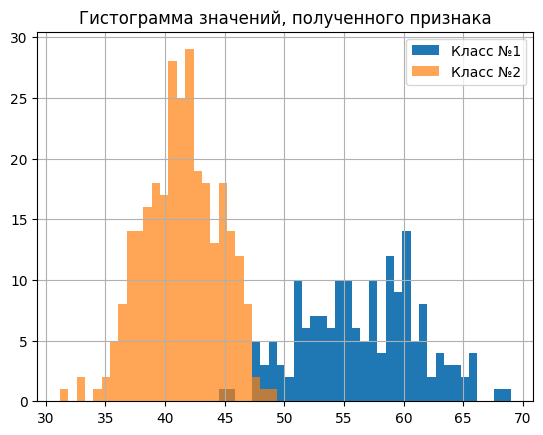

In [ ]:
binwidth = 0.7
plt.hist(Y0, bins=np.arange(min(Y0), max(Y0) + binwidth, binwidth), label='Класс №1', alpha=1.0)
plt.hist(Y1, bins=np.arange(min(Y1), max(Y1) + binwidth, binwidth), label='Класс №2', alpha=0.7)
plt.title("Гистограмма значений, полученного признака")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Calculate histograms
y1_hist = np.histogram(Y0, bins=np.arange(min(Y0), max(Y0) + binwidth, binwidth))
y2_hist = np.histogram(Y1, bins=np.arange(min(Y1), max(Y1) + binwidth, binwidth))

# Find peaks of histograms
y1_max = max(y1_hist[0])
y2_max = max(y2_hist[0])

# Find location of peaks
y1_max_coord = y1_hist[1][np.argwhere(y1_hist[0]==y1_max)[0][0]]
y2_max_coord = y2_hist[1][np.argwhere(y2_hist[0]==y2_max)[0][0]]

In [ ]:
print( "Maximum values on the histogram:\nFor the first class:", y1_max, "reached at", y1_max_coord,
      "\nFor the second class:", y2_max, "reached at", y2_max_coord)

Maximum values on the histogram:
For the first class: 14 reached at 59.88456514387139 
For the second class: 29 reached at 41.690052025559986


In [ ]:
threshold_range = np.arange(y2_max_coord, y1_max_coord, 0.01)
threshold_range

array([41.69005203, 41.70005203, 41.71005203, ..., 59.86005203,
       59.87005203, 59.88005203])

Threshold calculation

In [ ]:
def count_rel_error(hist_1, hist_2, thr):
    err_1 = np.sum(hist_1[0][np.nonzero(hist_1[1] < thr)[0]])
    err_2 = np.sum(hist_2[0][np.nonzero(hist_2[1] > thr)[0]-1])
    return (err_1+err_2)/(2*N)

error_range = np.array([count_rel_error(y1_hist, y2_hist, thr_x) for thr_x in threshold_range])
thr_new = threshold_range[np.argmin(error_range)]
thr_new

47.30005202555887

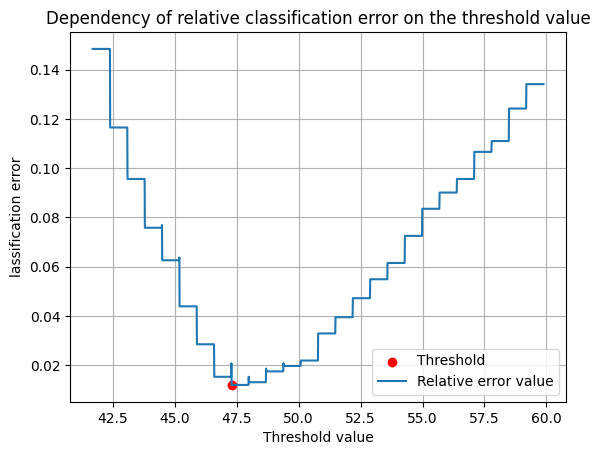

In [ ]:
plt.scatter(thr_new, np.min(error_range), c='r', label='Threshold')
plt.plot(threshold_range, error_range, label='Relative error value')
plt.title('Dependency of relative classification error on the threshold value')
plt.xlabel('Threshold value')
plt.ylabel('lassification error')
plt.legend()
plt.grid()
plt.show()

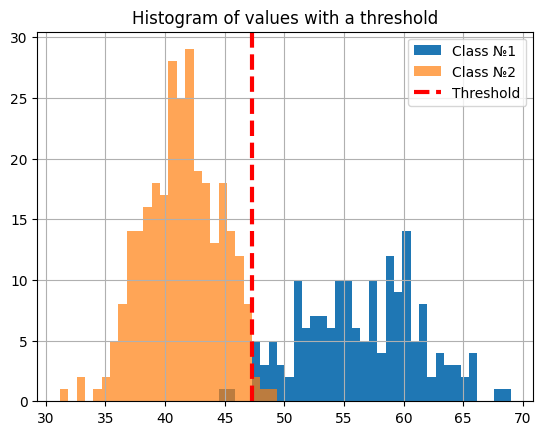

In [ ]:
binwidth = 0.7
plt.hist(Y0, bins=np.arange(min(Y0), max(Y0) + binwidth, binwidth), label='Class №1', alpha=1.0)
plt.hist(Y1, bins=np.arange(min(Y1), max(Y1) + binwidth, binwidth), label='Class №2', alpha=0.7)
plt.axvline(thr_new, color='r', linestyle='dashed', linewidth=3, label='Threshold')
plt.title('Histogram of values with a threshold')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print("The error on the training set was: %.4f" % np.min(error_range))

The error on the training set was: 0.0121


In [ ]:
x_test0 = x_test[y_test == 0]
x_test1 = x_test[y_test == 1]

y1_test = np.dot(x_test0, W)
y2_test = np.dot(x_test1, W)

y1_hist_test = np.histogram(y1_test, bins=np.arange(min(y1_test), max(y1_test) + binwidth, binwidth))
y2_hist_test = np.histogram(y2_test, bins=np.arange(min(y2_test), max(y2_test) + binwidth, binwidth))

error_test = count_rel_error(y1_hist_test, y2_hist_test, thr_new)

print("The error on the testing set was: %.2f" % error_test)

The error on the testing set was: 0.01


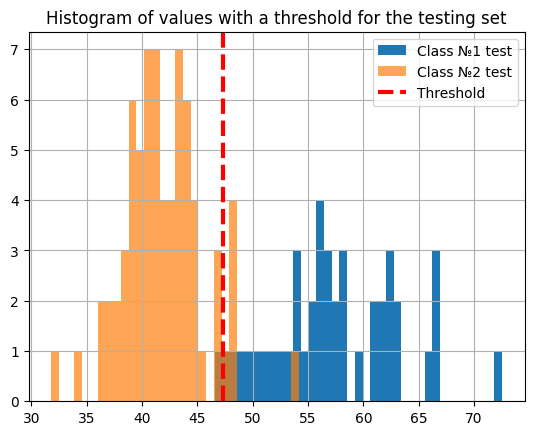

In [ ]:
binwidth = 0.7
plt.hist(y1_test, bins=np.arange(min(y1_test), max(y1_test) + binwidth, binwidth), label='Class №1 test', alpha=1.0)
plt.hist(y2_test, bins=np.arange(min(y2_test), max(y2_test) + binwidth, binwidth), label='Class №2 test', alpha=0.7)
plt.axvline(thr_new, color='r', linestyle='dashed', linewidth=3, label='Threshold')
plt.title("Histogram of values with a threshold for the testing set")
plt.legend()
plt.grid()
plt.show()

Algorithm for matrix confusion calculating

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax, cm

Output of the confusion matrix and classification metrics for the LDA method

LDA
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.92      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114

[[42  1]
 [ 6 65]]


(<Axes: xlabel='Predicted label', ylabel='True label'>,
 array([[42,  1],
        [ 6, 65]]))

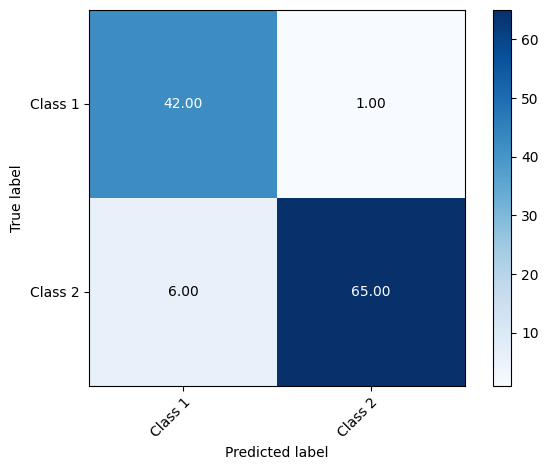

In [ ]:
expected = y_test

X = np.dot(x_test, W)

predicted = np.zeros(len(X))

for i in range(len(X)):

  if X[i] < thr_new: predicted[i] = 1

print("LDA")
print(metrics.classification_report(expected, predicted))
plot_confusion_matrix(expected, predicted, classes=np.array(["Class 1", "Class 2"]))

Output of the confusion matrix and classification metrics for the SVD (Singular Value Decomposition) method

[[ 3.80341976e+00 -5.39212301e-02 -4.39436335e-01 -6.34042278e-03
   7.93926949e+00  9.65027592e+01 -1.94072071e+01 -9.48433359e+01
   6.52894977e+00 -1.12179949e+02 -8.34003815e+00  2.43731481e-01
   1.59124190e-01  2.40224154e-02 -3.48805766e+02  4.26007772e+01
   8.24576776e+01 -3.50357849e+02  2.30465093e+01  5.81140729e+01
  -4.13737425e+00 -1.85553514e-01  1.68084303e-01  1.85463710e-02
  -2.55422830e+00 -1.47149164e+01 -1.18801082e+01  2.55875979e+01
  -1.97016750e+01 -2.45735089e+01]]
LDA
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[39  4]
 [ 1 70]]


(<Axes: xlabel='Predicted label', ylabel='True label'>,
 array([[39,  4],
        [ 1, 70]]))

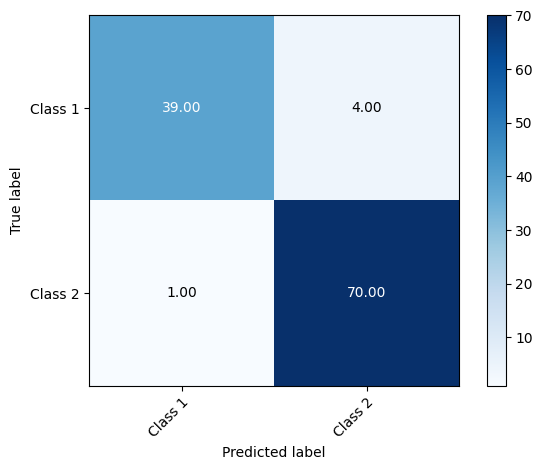

In [ ]:
clf1 = LinearDiscriminantAnalysis(solver="svd")
clf1.fit(x_train, y_train)
print(clf1.coef_)
expected = y_test
predicted = clf1.predict(x_test)
print("LDA")
print(metrics.classification_report(expected, predicted))
plot_confusion_matrix(expected, predicted, classes=np.array(["Class 1", "Class 2"]))

Output of the confusion matrix and classification metrics for the Least Squares method

[[ 3.82021189e+00 -5.41592931e-02 -4.41376451e-01 -6.36841581e-03
   7.97432145e+00  9.69288199e+01 -1.94928901e+01 -9.52620703e+01
   6.55777515e+00 -1.12675225e+02 -8.37685950e+00  2.44807558e-01
   1.59826724e-01  2.41284746e-02 -3.50345747e+02  4.27888601e+01
   8.28217291e+01 -3.51904683e+02  2.31482599e+01  5.83706471e+01
  -4.15564081e+00 -1.86372735e-01  1.68826397e-01  1.86282534e-02
  -2.56550525e+00 -1.47798829e+01 -1.19325590e+01  2.57005674e+01
  -1.97886581e+01 -2.46820012e+01]]
LDA
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[39  4]
 [ 1 70]]


(<Axes: xlabel='Predicted label', ylabel='True label'>,
 array([[39,  4],
        [ 1, 70]]))

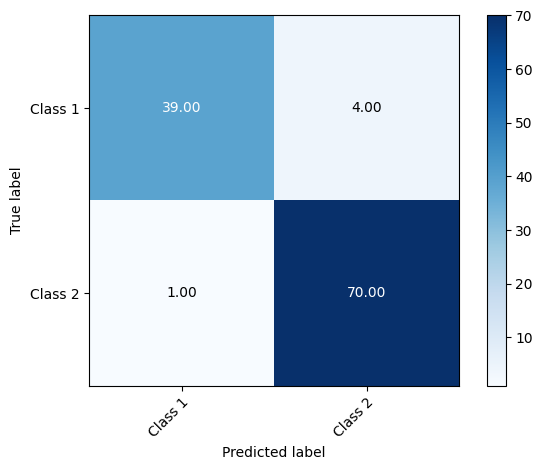

In [ ]:
clf2 = LinearDiscriminantAnalysis(solver="lsqr")
clf2.fit(x_train, y_train)
print(clf2.coef_)
expected = y_test
predicted = clf2.predict(x_test)
print("LDA")
print(metrics.classification_report(expected, predicted))
plot_confusion_matrix(expected, predicted, classes=np.array(["Class 1", "Class 2"]))

Output of the confusion matrix and classification metrics for the PCA method

[[ 3.82021190e+00 -5.41592930e-02 -4.41376452e-01 -6.36841581e-03
   7.97432145e+00  9.69288200e+01 -1.94928901e+01 -9.52620703e+01
   6.55777515e+00 -1.12675225e+02 -8.37685951e+00  2.44807558e-01
   1.59826725e-01  2.41284746e-02 -3.50345747e+02  4.27888601e+01
   8.28217291e+01 -3.51904683e+02  2.31482599e+01  5.83706471e+01
  -4.15564081e+00 -1.86372735e-01  1.68826397e-01  1.86282534e-02
  -2.56550524e+00 -1.47798829e+01 -1.19325590e+01  2.57005674e+01
  -1.97886581e+01 -2.46820012e+01]]
Модель 1. Линейный дискриминантный анализ
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[39  4]
 [ 1 70]]


(<Axes: xlabel='Predicted label', ylabel='True label'>,
 array([[39,  4],
        [ 1, 70]]))

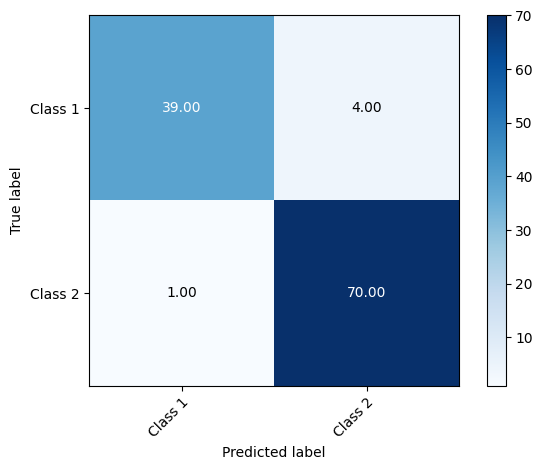

In [ ]:
clf3 = LinearDiscriminantAnalysis(solver="eigen")
clf3.fit(x_train, y_train)
print(clf3.coef_)
expected = y_test
predicted = clf3.predict(x_test)
print("Модель 1. Линейный дискриминантный анализ")
print(metrics.classification_report(expected, predicted))
plot_confusion_matrix(expected, predicted, classes=np.array(["Class 1", "Class 2"]))